
# Electric Vehicle Data Analysis and Machine Learning

This notebook contains an exploratory data analysis (EDA) and machine learning models to analyze and predict characteristics of electric vehicles (EVs) using a dataset of electric vehicle registrations.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score


In [2]:

# Load the dataset
file_path = 'Electric_Vehicle_Population_Data.csv'
ev_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
ev_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4AZ0CP1D,NaN,NaN,AP,NaN,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,NaN,112277063,NaN,NaN,NaN
1,2C4RC1N74L,Goochland,Henrico,VA,23238.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,NaN,136930965,POINT (-77.6341499 37.6155028),NON WASHINGTON STATE ELECTRIC UTILITY,5.107540e+10
2,7JRBR0FZ2N,Goochland,Henrico,VA,23238.0,2022,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,203323767,POINT (-77.6341499 37.6155028),NON WASHINGTON STATE ELECTRIC UTILITY,5.107540e+10
3,5YJ3E1EB1N,Goochland,Henrico,VA,23238.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,187129750,POINT (-77.6341499 37.6155028),NON WASHINGTON STATE ELECTRIC UTILITY,5.107540e+10
4,5YJSA1E54P,District of Columbia,Washington,DC,20003.0,2023,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,238713044,POINT (-76.985835 38.88411),NON WASHINGTON STATE ELECTRIC UTILITY,1.100101e+10


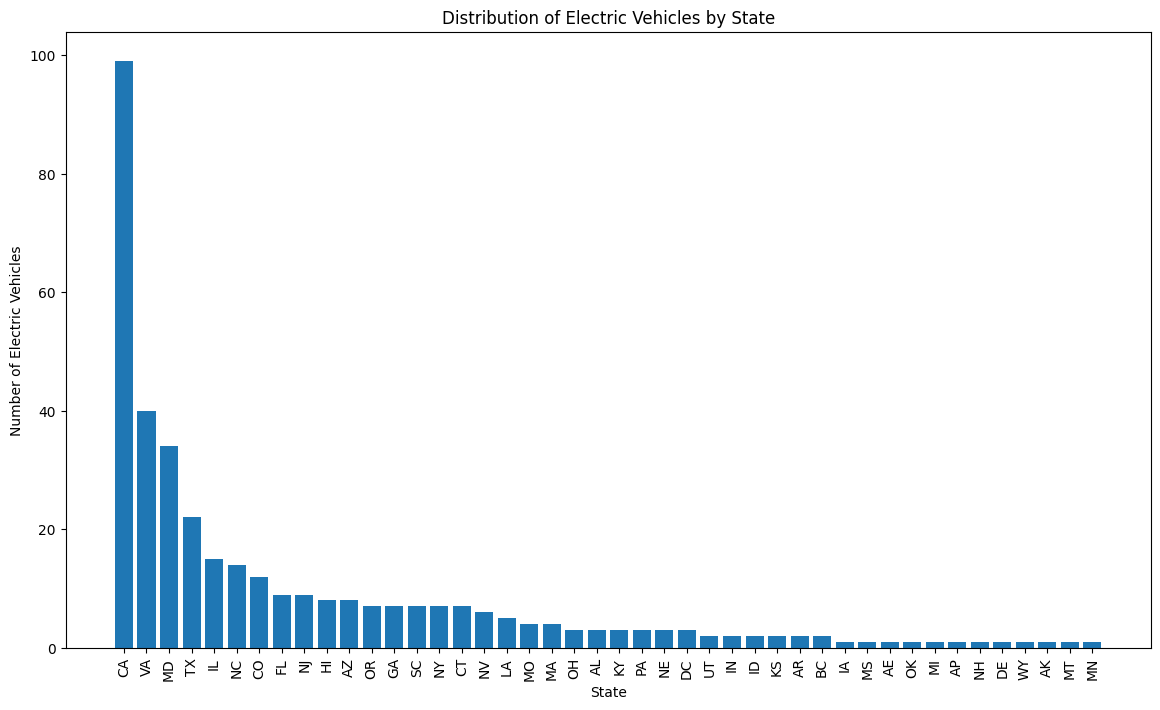

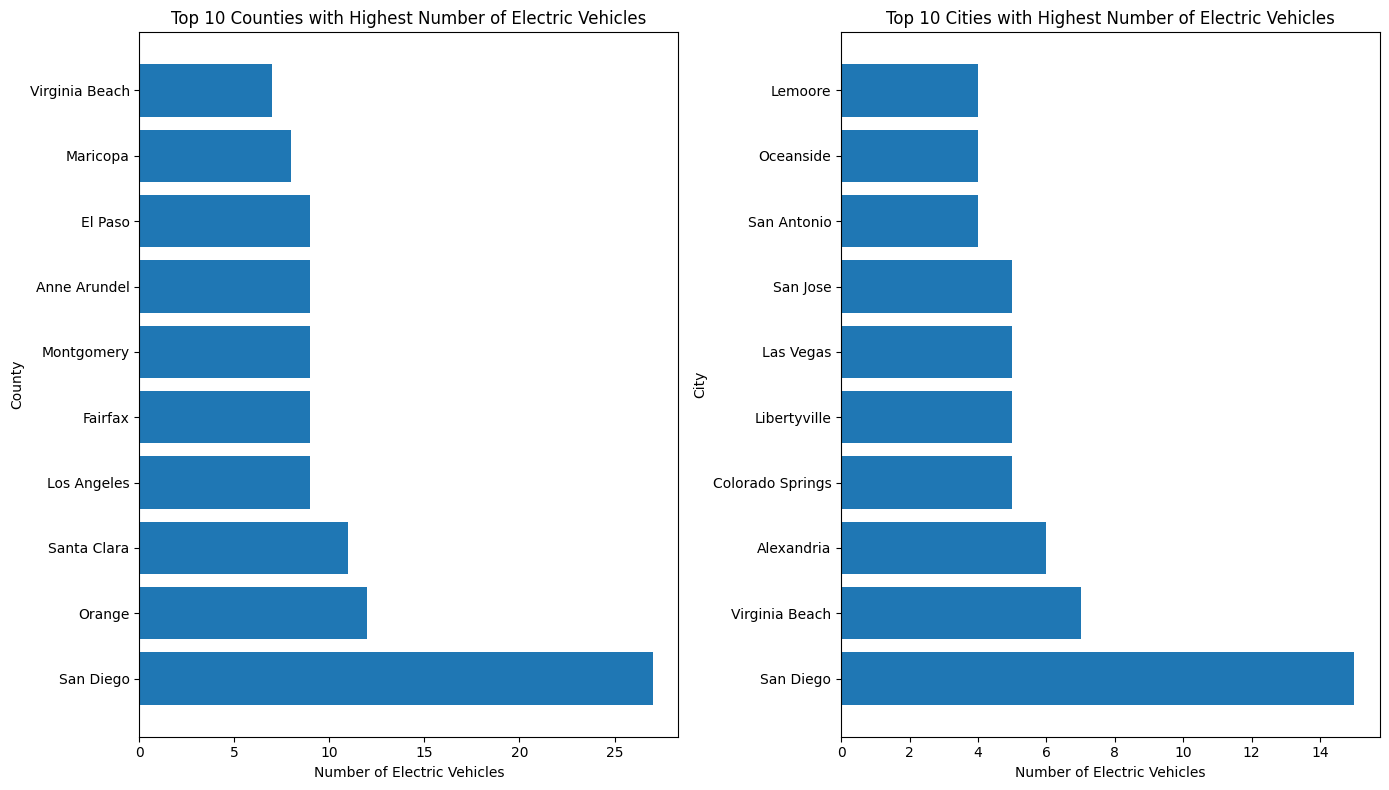

In [3]:

# Analyze the distribution of electric vehicles by state
ev_distribution_state = ev_data['State'].value_counts().reset_index()
ev_distribution_state.columns = ['State', 'Number of EVs']

# Plot the distribution of electric vehicles by state
plt.figure(figsize=(14, 8))
plt.bar(ev_distribution_state['State'], ev_distribution_state['Number of EVs'])
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicles')
plt.title('Distribution of Electric Vehicles by State')
plt.xticks(rotation=90)
plt.show()

# Analyze the distribution of electric vehicles by county
ev_distribution_county = ev_data['County'].value_counts().reset_index()
ev_distribution_county.columns = ['County', 'Number of EVs']

# Analyze the distribution of electric vehicles by city
ev_distribution_city = ev_data['City'].value_counts().reset_index()
ev_distribution_city.columns = ['City', 'Number of EVs']

# Plot the top 10 counties and cities with the highest number of electric vehicles
top_n = 10

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.barh(ev_distribution_county['County'][:top_n], ev_distribution_county['Number of EVs'][:top_n])
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.title('Top 10 Counties with Highest Number of Electric Vehicles')

plt.subplot(1, 2, 2)
plt.barh(ev_distribution_city['City'][:top_n], ev_distribution_city['Number of EVs'][:top_n])
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Number of Electric Vehicles')

plt.tight_layout()
plt.show()


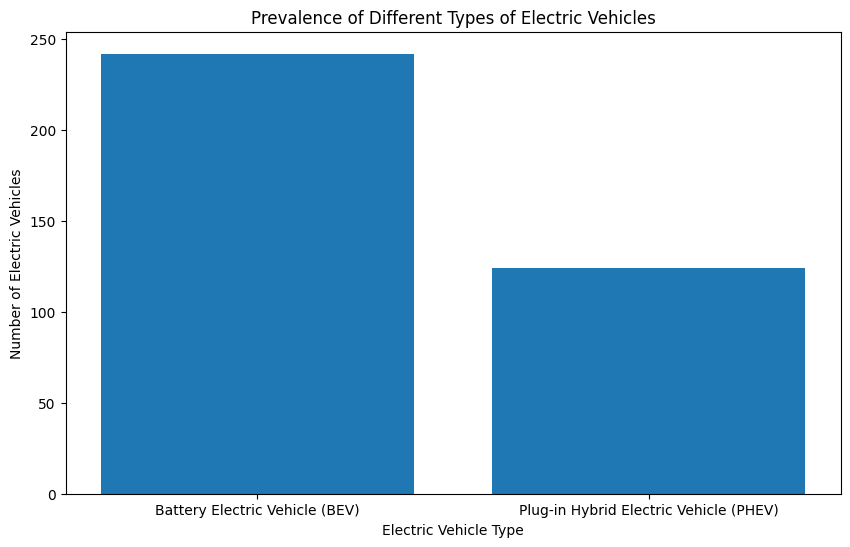

In [4]:

# Analyze the prevalence of different types of electric vehicles
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts().reset_index()
ev_type_distribution.columns = ['Electric Vehicle Type', 'Number of EVs']

# Plot the prevalence of different types of electric vehicles
plt.figure(figsize=(10, 6))
plt.bar(ev_type_distribution['Electric Vehicle Type'], ev_type_distribution['Number of EVs'])
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Electric Vehicles')
plt.title('Prevalence of Different Types of Electric Vehicles')
plt.show()


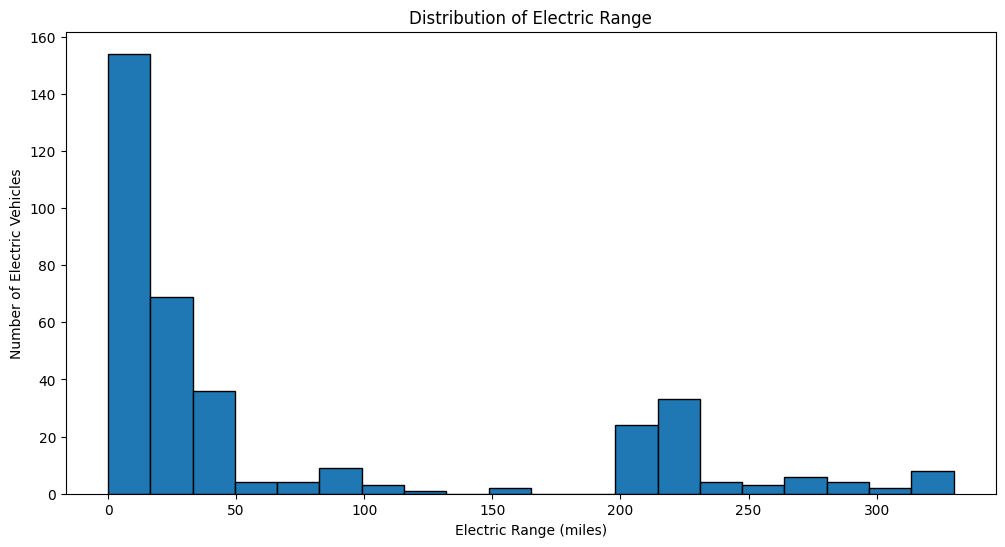

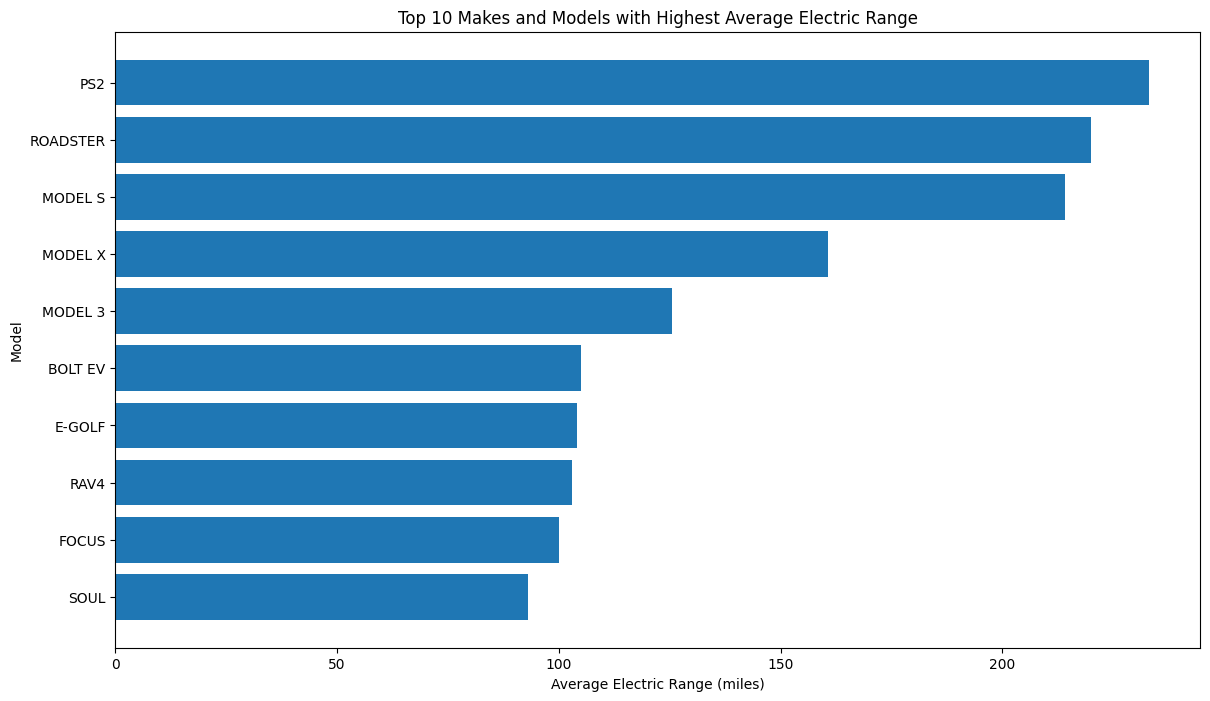

In [5]:

# Analyze the electric range distribution
plt.figure(figsize=(12, 6))
plt.hist(ev_data['Electric Range'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Electric Vehicles')
plt.title('Distribution of Electric Range')
plt.show()

# Calculate the average electric range for each make and model
ev_range_by_make_model = ev_data.groupby(['Make', 'Model'])['Electric Range'].mean().reset_index()
ev_range_by_make_model.columns = ['Make', 'Model', 'Average Electric Range']
ev_range_by_make_model = ev_range_by_make_model.sort_values(by='Average Electric Range', ascending=False)

# Plot the top 10 makes and models with the highest average electric range
top_n = 10

plt.figure(figsize=(14, 8))
plt.barh(ev_range_by_make_model['Model'][:top_n], ev_range_by_make_model['Average Electric Range'][:top_n])
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.title('Top 10 Makes and Models with Highest Average Electric Range')
plt.gca().invert_yaxis()
plt.show()


In [6]:

# Data Preparation
# Drop rows with missing target variable
ev_data_cleaned = ev_data.dropna(subset=['Electric Vehicle Type'])

# Select features and target variable
features = ['Model Year', 'Make', 'Model', 'Base MSRP']
target = 'Electric Vehicle Type'

# Handle missing values for 'Base MSRP'
imputer = SimpleImputer(strategy='mean')
ev_data_cleaned['Base MSRP'] = imputer.fit_transform(ev_data_cleaned[['Base MSRP']])

# Encode categorical variables
label_encoders = {}
for column in ['Make', 'Model']:
    le = LabelEncoder()
    ev_data_cleaned[column] = le.fit_transform(ev_data_cleaned[column])
    label_encoders[column] = le

# Encode target variable
target_encoder = LabelEncoder()
ev_data_cleaned[target] = target_encoder.fit_transform(ev_data_cleaned[target])

# Split the data into training and testing sets
X = ev_data_cleaned[features]
y = ev_data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.93
Classification Report:
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.96      0.94      0.95        49
Plug-in Hybrid Electric Vehicle (PHEV)       0.88      0.92      0.90        25

                              accuracy                           0.93        74
                             macro avg       0.92      0.93      0.93        74
                          weighted avg       0.93      0.93      0.93        74



In [7]:

# Data Preparation for Regression
# Drop rows with missing target variable
ev_data_cleaned = ev_data.dropna(subset=['Electric Range'])

# Select features and target variable
features = ['Model Year', 'Make', 'Model', 'Base MSRP']
target = 'Electric Range'

# Handle missing values for 'Base MSRP'
ev_data_cleaned['Base MSRP'] = imputer.fit_transform(ev_data_cleaned[['Base MSRP']])

# Encode categorical variables
for column in ['Make', 'Model']:
    ev_data_cleaned[column] = label_encoders[column].transform(ev_data_cleaned[column])

# Split the data into training and testing sets
X = ev_data_cleaned[features]
y = ev_data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Regressor
regressor_rf = RandomForestRegressor(random_state=42)
regressor_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = regressor_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')


Mean Squared Error: 868.18
R-squared: 0.90


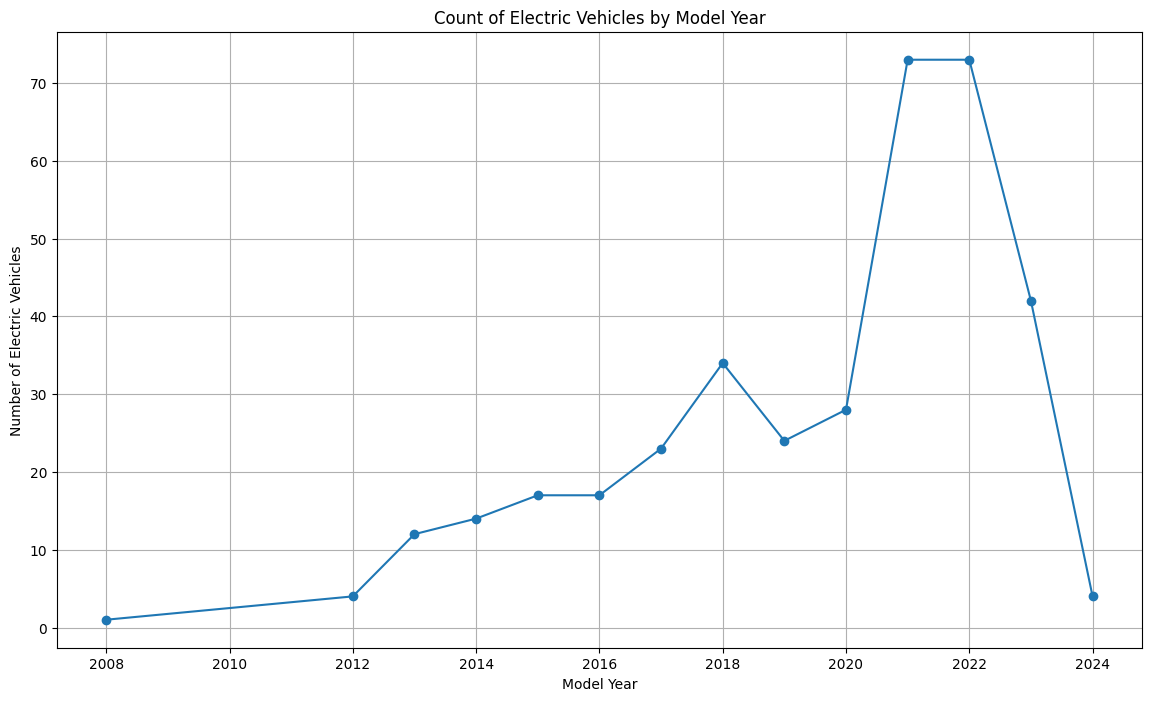

In [8]:

# Count of Electric Vehicles by Model Year
ev_count_by_year = ev_data['Model Year'].value_counts().sort_index()

# Plot the count of electric vehicles by model year
plt.figure(figsize=(14, 8))
plt.plot(ev_count_by_year.index, ev_count_by_year.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Count of Electric Vehicles by Model Year')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

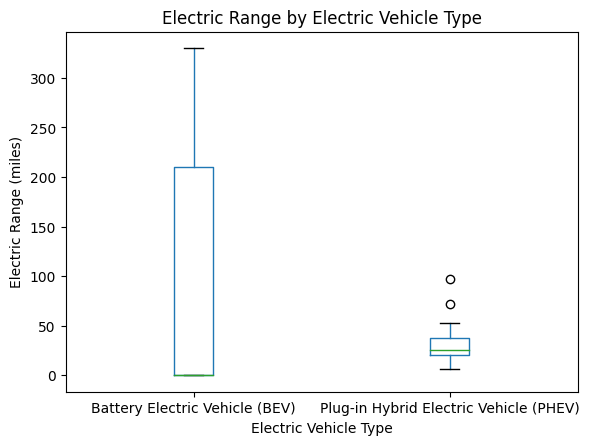

In [9]:

# Box Plot of Electric Range by Electric Vehicle Type
plt.figure(figsize=(12, 6))
ev_data.boxplot(column='Electric Range', by='Electric Vehicle Type', grid=False)
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.title('Electric Range by Electric Vehicle Type')
plt.suptitle('')  # Suppress the default title
plt.show()


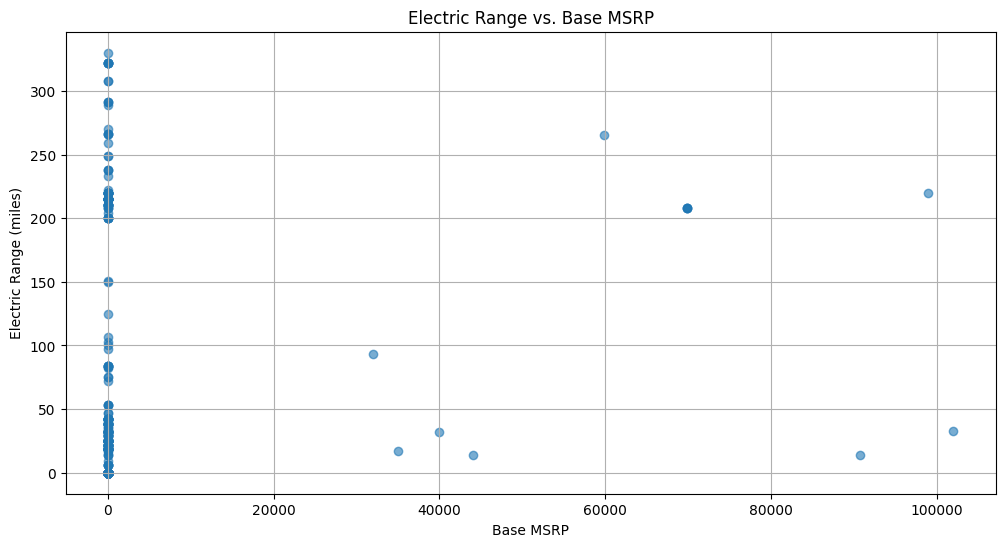

In [10]:

# Scatter Plot of Electric Range vs. Base MSRP
plt.figure(figsize=(12, 6))
plt.scatter(ev_data['Base MSRP'], ev_data['Electric Range'], alpha=0.6)
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range (miles)')
plt.title('Electric Range vs. Base MSRP')
plt.grid(True)
plt.show()
